# Data analysis for all data collected during our project
 

#### imports and  loading Data 

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from operator import itemgetter
from scipy.stats import shapiro 

dfCounting16 = pd.read_csv("CleanData/counting-400runsClean-PC16.csv")
dfRead16 = pd.read_csv("CleanData/readCSVClean-PC16.csv")

dfCounting16.head()


,PKG (J),CPU (J),DRAM (J),Time (ms),Temp (C),Input case,Size
0,2.893311,2.514954,0.166016,286.242,57.0,best,25000.0
1,2.569702,2.237183,0.142822,271.777,57.0,best,25000.0
2,3.000427,2.612549,0.178101,295.577,57.0,best,25000.0
3,2.849365,2.477051,0.157349,293.878,57.0,best,25000.0
4,2.866882,2.465088,0.181396,319.299,57.0,best,25000.0


In [35]:
dfRead16.head()

,PKG (J),CPU (J),DRAM (J),Time (ms),Temp (C),Input case,Size
0,2.240601,1.966187,0.134399,227.880,53.0,random1,25000
1,2.062317,1.775085,0.126160,250.212,53.0,random1,25000
2,2.140869,1.876709,0.121887,222.526,53.0,random1,25000
3,2.217102,1.940735,0.133545,226.620,53.0,random1,25000
4,2.058533,1.796814,0.119385,219.516,53.0,random1,25000


In [36]:
def calcMean(df,type,size):
    meandf = df[df["Input case"] == type][df["Size"]==size].mean()
    meandf["Input case"] = type
    return meandf

def mean_of_dataset(df):
    s = [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]
    c = ["best", "worst"]#, "random1","random2","random3","random4","random5","random6","random7","random8","random9","random10"]
    l = []
    for case in c:
        for size in s:
            l.append(calcMean(df, case, size))   
    
    dfMeans = pd.concat([series.to_frame().T for series in l], ignore_index=True)
    return dfMeans

dfCountingMean16 = mean_of_dataset(dfCounting16)
dfCountingMean16.head()

<ipython-input-36-0e9f57857992>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  meandf = df[df["Input case"] == type][df["Size"]==size].mean()


,PKG (J),CPU (J),DRAM (J),Time (ms),Temp (C),Size,Input case
0,2.79838,2.41912,0.161762,301.703,57.8846,25000,best
1,3.52169,3.05028,0.213686,363.384,59.3846,50000,best
2,4.09021,3.54029,0.24785,421.487,62,75000,best
3,4.95524,4.29003,0.291819,527.202,62.1,100000,best
4,7.25344,6.24272,0.44652,783.142,62.8333,200000,best


In [37]:
def list_of_case(df):
    l = []
    for i in range(len(df)):
        if df["Input case"].iloc[i] not in l:
            l.append(df["Input case"].iloc[i])
    return l


def mean_of_dataset_readCSV(df):
    s = [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]
    c = list_of_case(df)
    l = []
    for case in range(len(c)):
        for size in range(len(s)):
            l.append(calcMean(df, c[case], s[size]))  

    dfMeans = pd.concat([series.to_frame().T  for series in l], ignore_index=True)
    return dfMeans

dfReadMean16 = mean_of_dataset_readCSV(dfRead16)
dfReadMean16.head()

<ipython-input-36-0e9f57857992>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  meandf = df[df["Input case"] == type][df["Size"]==size].mean()


,PKG (J),CPU (J),DRAM (J),Time (ms),Temp (C),Size,Input case
0,2.14915,1.87396,0.12836,231.807,53.9737,25000,random1
1,2.51943,2.18513,0.150334,264.781,57,50000,random1
2,3.05994,2.66851,0.178193,304.554,61,75000,random1
3,3.52485,3.07726,0.205626,343.571,63.5278,100000,random1
4,4.16606,3.62685,0.233299,420.754,65.425,200000,random1


In [38]:
# meanC6 = meanC6.reset_index(drop=True)
# meanC21 = meanC21.reset_index(drop=True)
# meanC23 = meanC23.reset_index(drop=True)
# meanR6 = meanR6.reset_index(drop=True)
# meanR21 = meanR21.reset_index(drop=True)
# meanR23 = meanR23.reset_index(drop=True)
meanC16 = dfCountingMean16.reset_index(drop=True)
meanR16 = dfReadMean16.reset_index(drop=True)
meanC16.head()

,PKG (J),CPU (J),DRAM (J),Time (ms),Temp (C),Size,Input case
0,2.79838,2.41912,0.161762,301.703,57.8846,25000,best
1,3.52169,3.05028,0.213686,363.384,59.3846,50000,best
2,4.09021,3.54029,0.24785,421.487,62,75000,best
3,4.95524,4.29003,0.291819,527.202,62.1,100000,best
4,7.25344,6.24272,0.44652,783.142,62.8333,200000,best


In [39]:
def deductReadFromAlg(meanC, meanR):
    lc = []
    lt = []
    lm = []

    for i in range(len(meanC["Size"])):
        case = meanC["Input case"][i]
        size = meanC["Size"][i]
        if case == "best":
                case2 = "countingbest"
        if case == "worst":
            case2 = "countingworst"
        if case.startswith("random"):
            case2 = "countingrandom"+case.split("m")[-1]

        Cc = meanC[meanC["Input case"] == case][meanC["Size"]==size]["CPU (J)"][meanC[meanC["Input case"] == case][meanC["Size"]==size]["CPU (J)"].index.tolist()[0]]
        Rc = meanR[meanR["Input case"] == case2][meanR["Size"]==size]["CPU (J)"][meanR[meanR["Input case"] == case2][meanR["Size"]==size]["CPU (J)"].index.tolist()[0]]
        lc.append((Cc-Rc)/400)

        Ct = meanC[meanC["Input case"] == case][meanC["Size"]==size]["Time (ms)"][meanC[meanC["Input case"] == case][meanC["Size"]==size]["Time (ms)"].index.tolist()[0]]
        Rt = meanR[meanR["Input case"] == case2][meanR["Size"]==size]["Time (ms)"][meanR[meanR["Input case"] == case2][meanR["Size"]==size]["Time (ms)"].index.tolist()[0]]
        lt.append((Ct-Rt)/400)

        Cm = meanC[meanC["Input case"] == case][meanC["Size"]==size]["DRAM (J)"][meanC[meanC["Input case"] == case][meanC["Size"]==size]["DRAM (J)"].index.tolist()[0]]
        Rm = meanR[meanR["Input case"] == case2][meanR["Size"]==size]["DRAM (J)"][meanR[meanR["Input case"] == case2][meanR["Size"]==size]["DRAM (J)"].index.tolist()[0]]
        lm.append((Cm-Rm)/400)

    meanC["CPU - readCSV"] = lc
    meanC["Time - readCSV"] = lt
    meanC["Memory - readCSV"] = lm


deductReadFromAlg(dfCountingMean16, dfReadMean16)
dfCountingMean16


<ipython-input-39-cd311c1a7be1>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Cc = meanC[meanC["Input case"] == case][meanC["Size"]==size]["CPU (J)"][meanC[meanC["Input case"] == case][meanC["Size"]==size]["CPU (J)"].index.tolist()[0]]
<ipython-input-39-cd311c1a7be1>:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Rc = meanR[meanR["Input case"] == case2][meanR["Size"]==size]["CPU (J)"][meanR[meanR["Input case"] == case2][meanR["Size"]==size]["CPU (J)"].index.tolist()[0]]
<ipython-input-39-cd311c1a7be1>:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Ct = meanC[meanC["Input case"] == case][meanC["Size"]==size]["Time (ms)"][meanC[meanC["Input case"] == case][meanC["Size"]==size]["Time (ms)"].index.tolist()[0]]
<ipython-input-39-cd311c1a7be1>:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Rt = meanR[meanR["Input case"] == case2][meanR["Size"]==size]["T

,PKG (J),CPU (J),DRAM (J),Time (ms),Temp (C),Size,Input case,CPU - readCSV,Time - readCSV,Memory - readCSV
0,2.79838,2.41912,0.161762,301.703,57.8846,25000,best,0.002099,0.262636,0.000144
1,3.52169,3.05028,0.213686,363.384,59.3846,50000,best,0.002623,0.327172,0.000211
2,4.09021,3.54029,0.24785,421.487,62,75000,best,0.002975,0.394528,0.000241
3,4.95524,4.29003,0.291819,527.202,62.1,100000,best,0.004157,0.591168,0.000310
4,7.25344,6.24272,0.44652,783.142,62.8333,200000,best,0.006852,1.005823,0.000560
5,9.02101,7.68806,0.613706,1005.17,63.8462,300000,best,0.009730,1.480042,0.000930
6,10.7575,9.11709,0.776097,1227.87,62.2667,400000,best,0.012556,1.952875,0.001288
7,12.2228,10.3048,1.00705,1406.6,62.5667,500000,best,0.014956,2.318528,0.001825
8,13.4199,11.2709,1.21586,1547.36,63.2593,600000,best,0.016706,2.578926,0.002300
9,14.9862,12.5381,1.44474,1744.37,63.2069,700000,best,0.019352,2.998239,0.002836


# Shapiro Wilks Test

In [40]:
dfCounting16

,PKG (J),CPU (J),DRAM (J),Time (ms),Temp (C),Input case,Size
0,2.893311,2.514954,0.166016,286.242,57.0,best,25000.0
1,2.569702,2.237183,0.142822,271.777,57.0,best,25000.0
2,3.000427,2.612549,0.178101,295.577,57.0,best,25000.0
3,2.849365,2.477051,0.157349,293.878,57.0,best,25000.0
4,2.866882,2.465088,0.181396,319.299,57.0,best,25000.0
...,...,...,...,...,...,...,...
701,493.700745,330.640930,111.372681,111212.000,53.0,worst,1000000.0
702,493.633667,330.534607,111.522034,111266.000,53.0,worst,1000000.0
703,493.404846,330.862610,111.068359,110870.000,53.0,worst,1000000.0
704,493.722107,330.744995,111.461060,111168.000,53.0,worst,1000000.0


In [41]:
dfCountingSortBest16 = dfCounting16[dfCounting16["Input case"].str.startswith("best")]
dfCountingSortWorst16 = dfCounting16[dfCounting16["Input case"].str.startswith("worst")]
#dfCountingSortRandom16 = dfCounting16[dfCounting16["Input case"].str.startswith("random")]

print(dfCountingSortBest16)

       PKG (J)    CPU (J)  DRAM (J)  Time (ms)  Temp (C) Input case       Size
0     2.893311   2.514954  0.166016    286.242      57.0       best    25000.0
1     2.569702   2.237183  0.142822    271.777      57.0       best    25000.0
2     3.000427   2.612549  0.178101    295.577      57.0       best    25000.0
3     2.849365   2.477051  0.157349    293.878      57.0       best    25000.0
4     2.866882   2.465088  0.181396    319.299      57.0       best    25000.0
..         ...        ...       ...        ...       ...        ...        ...
349  19.447388  16.158020  2.081726   2322.510      63.0       best  1000000.0
350  20.082886  16.762146  2.136169   2350.890      63.0       best  1000000.0
351  20.091370  16.698486  2.152588   2369.040      64.0       best  1000000.0
352  19.484802  16.152893  2.089661   2379.410      65.0       best  1000000.0
353  20.487915  17.031677  2.141296   2441.070      65.0       best  1000000.0

[354 rows x 7 columns]


In [42]:
(dfCountingMean16[dfCountingMean16["Size"]==50000]["CPU (J)"])

1     3.05028
14    237.727
Name: CPU (J), dtype: object

In [43]:
# data = []
# size = []
# for i in [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]:
#     if 0.05 < shapiro(dfCountingMean16[dfCountingMean16["Size"]==i]["CPU (J)"]).pvalue:
#         data.append(1)
#     else:
#         data.append(0)
#     size.append(i)
#     print(shapiro(dfCountingMean16[dfCountingMean16["Size"]==i]["CPU (J)"]).pvalue)
# print(data)

In [44]:
dataBest = []
sizeBest = []
for i in [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]:
    if 0.05 < shapiro(dfCountingSortBest16[dfCountingSortBest16["Size"]==i]["CPU (J)"]).pvalue:
        dataBest.append(1)
    else:
        dataBest.append(0)
    sizeBest.append(i)
    print(shapiro(dfCountingSortBest16[dfCountingSortBest16["Size"]==i]["CPU (J)"]).pvalue)
print(dataBest)

0.7022752165794373
0.7396940588951111
0.6092666387557983
0.4449402987957001
0.24256950616836548
0.8952056765556335
0.6467084288597107
0.3764971196651459
0.03660203889012337
0.8461082577705383
0.06839078664779663
0.5804508924484253
0.06657012552022934
[1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1]


In [45]:
dataWorst = []
sizeWorst = []
for i in [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]:
    if 0.05 < shapiro(dfCountingSortWorst16[dfCountingSortWorst16["Size"]==i]["CPU (J)"]).pvalue:
        dataWorst.append(1)
    else:
        dataWorst.append(0)
    sizeWorst.append(i)
    print(shapiro(dfCountingSortWorst16[dfCountingSortWorst16["Size"]==i]["CPU (J)"]).pvalue)
print(dataWorst)

0.4334169626235962
0.9237748980522156
0.3061322569847107
0.045973170548677444
0.5382108688354492
0.10234219580888748
0.4261988401412964
0.9842739701271057
0.5111963748931885
0.3684655427932739
0.5329585075378418
0.997015655040741
0.3755693733692169
[1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]


# PLOTS

In [46]:
# For bubblesort: polynomial regression
def polyReg(SeriesX, SeriesY,dg, Label, color, plotLabel = True, regLine=True, printR2Score = True, plotGraph = True, dots="o"):
    X = SeriesX.values.reshape(SeriesX.size, -1)
    y = SeriesY.values

    fitness = []
   #for dg in range(minDegrees, maxDegrees):
    # Create an empty polynomial function with degree of 4
    poly_reg = PolynomialFeatures(degree=dg)
    
    # Fit the function to the X and transform X to the polynomial format
    X_poly = poly_reg.fit_transform(X)

    # Now we construct a Multiple Linear Regressor on the transformed X_ploy
    lr_2 = LinearRegression()  
    lr_2.fit(X_poly, y)  
    
    # Get the y values using the constructed Multiple Linear Regressor
    y_poly = lr_2.predict(X_poly)
    
    r2 = metrics.r2_score(y,y_poly)
    #if printR2Score:
    #    print(f"r2_score for {Label} {dg} is: {r2}")
    fitness.append((f"poly {dg}dg", r2, y_poly))
    #print(f"Parameters of poly: {poly_reg.get_params()}") #does not give what we are looking for
    
    if plotGraph:
        plt.plot(X, y,dots, color=color,markersize=10, markerfacecolor = "none")
        if r2 > 0.5 and regLine:
            plt.plot(X, y_poly, color=color, linewidth=2)
        #plt.legend(loc='upper left')
    #print(lr_2.intercept_, lr_2.coef_)
    return max(fitness,key=itemgetter(1))

In [47]:
def getIndex(df,case,size):
    return df[df["Input case"] == case][df["Size"]==size].index.tolist()[0]

In [48]:
def calcPercent(df):
    cpuPercent = []
    pkgPercent = []
    fullEC = []
    for case in ["best", "worst"]:#, "random"]:
        if case != "random":
            for size in [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]:
                cpuPercent.append(df["CPU - readCSV"][getIndex(df,case,size)] / df["PKG (J)"][getIndex(df,case,size)] * 100)
                pkgPercent.append(100)
                fullEC.append(df["CPU - readCSV"][getIndex(df,case,size)]+df["Memory - readCSV"][getIndex(df,case,size)])
        else :
            for i in range(1,11):
                for size in [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]:
                    cpuPercent.append(df["CPU (J)"][getIndex(df,case+str(i),size)] / df["PKG (J)"][getIndex(df,case+str(i),size)] * 100)
                    pkgPercent.append(100)
                    fullEC.append(df["CPU - readCSV"][getIndex(df,case+str(i),size)]+df["Memory - readCSV"][getIndex(df,case+str(i),size)])

    df["CPU % of PKG"] = cpuPercent
    df["PKG %"] = pkgPercent
    df["full EC"] = fullEC
calcPercent(dfCountingMean16)
dfCountingMean16.head()

<ipython-input-47-565db17a79a7>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return df[df["Input case"] == case][df["Size"]==size].index.tolist()[0]


,PKG (J),CPU (J),DRAM (J),Time (ms),Temp (C),Size,Input case,CPU - readCSV,Time - readCSV,Memory - readCSV,CPU % of PKG,PKG %,full EC
0,2.79838,2.41912,0.161762,301.703,57.8846,25000,best,0.002099,0.262636,0.000144,0.074993,100,0.002243
1,3.52169,3.05028,0.213686,363.384,59.3846,50000,best,0.002623,0.327172,0.000211,0.074483,100,0.002834
2,4.09021,3.54029,0.24785,421.487,62,75000,best,0.002975,0.394528,0.000241,0.072740,100,0.003216
3,4.95524,4.29003,0.291819,527.202,62.1,100000,best,0.004157,0.591168,0.000310,0.083900,100,0.004467
4,7.25344,6.24272,0.44652,783.142,62.8333,200000,best,0.006852,1.005823,0.000560,0.094463,100,0.007412


In [49]:
dfCountingMean16[dfCountingMean16["Input case"] == "random1"]["full EC"].mean()

nan

In [50]:
print("counting worst power estimate: "+str(dfCountingMean16[dfCountingMean16["Input case"] == "worst"]["full EC"].mean() / dfCountingMean16[dfCountingMean16["Input case"] == "worst"]["Time - readCSV"].mean() * 1000)+" W")
print("counting best power estimate: "+str(dfCountingMean16[dfCountingMean16["Input case"] == "best"]["full EC"].mean() / dfCountingMean16[dfCountingMean16["Input case"] == "best"]["Time - readCSV"].mean() * 1000)+" W")

# for i in range(1,11):
#     print("counting random power estimate: "+str(dfCountingMean16[dfCountingMean16["Input case"] == "random"+str(i)]["full EC"].mean() / dfCountingMean16[dfCountingMean16["Input case"] == "random"+str(i)]["Time - readCSV"].mean() * 1000)+" W")

counting worst power estimate: 5.058609032197836 W
counting best power estimate: 7.410157459911231 W


In [51]:
dfCountingMean16[dfCountingMean16["Size"]==1000000]

,PKG (J),CPU (J),DRAM (J),Time (ms),Temp (C),Size,Input case,CPU - readCSV,Time - readCSV,Memory - readCSV,CPU % of PKG,PKG %,full EC
12,19.8253,16.4851,2.1106,2357.92,63.7917,1e+06,best,0.026733,4.131287,0.004373,0.134841,100,0.031106
25,493.329,330.693,111.257,110962,53,1e+06,worst,0.809611,275.318784,0.277135,0.164112,100,1.086746


In [52]:
dfCountingMean16[dfCountingMean16["Input case"]=="best"]

,PKG (J),CPU (J),DRAM (J),Time (ms),Temp (C),Size,Input case,CPU - readCSV,Time - readCSV,Memory - readCSV,CPU % of PKG,PKG %,full EC
0,2.79838,2.41912,0.161762,301.703,57.8846,25000,best,0.002099,0.262636,0.000144,0.074993,100,0.002243
1,3.52169,3.05028,0.213686,363.384,59.3846,50000,best,0.002623,0.327172,0.000211,0.074483,100,0.002834
2,4.09021,3.54029,0.24785,421.487,62,75000,best,0.002975,0.394528,0.000241,0.072740,100,0.003216
3,4.95524,4.29003,0.291819,527.202,62.1,100000,best,0.004157,0.591168,0.000310,0.083900,100,0.004467
4,7.25344,6.24272,0.44652,783.142,62.8333,200000,best,0.006852,1.005823,0.000560,0.094463,100,0.007412
5,9.02101,7.68806,0.613706,1005.17,63.8462,300000,best,0.009730,1.480042,0.000930,0.107859,100,0.010660
6,10.7575,9.11709,0.776097,1227.87,62.2667,400000,best,0.012556,1.952875,0.001288,0.116716,100,0.013844
7,12.2228,10.3048,1.00705,1406.6,62.5667,500000,best,0.014956,2.318528,0.001825,0.122362,100,0.016781
8,13.4199,11.2709,1.21586,1547.36,63.2593,600000,best,0.016706,2.578926,0.002300,0.124489,100,0.019007
9,14.9862,12.5381,1.44474,1744.37,63.2069,700000,best,0.019352,2.998239,0.002836,0.129131,100,0.022188


In [53]:
dfCountingMean16[dfCountingMean16["Input case"] != "best"][dfCountingMean16["full EC"] > 3]

<ipython-input-53-1bf9227acf6d>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfCountingMean16[dfCountingMean16["Input case"] != "best"][dfCountingMean16["full EC"] > 3]


,PKG (J),CPU (J),DRAM (J),Time (ms),Temp (C),Size,Input case,CPU - readCSV,Time - readCSV,Memory - readCSV,CPU % of PKG,PKG %,full EC


worst R2  0.998864977517756 

best R2  0.996999163192462 



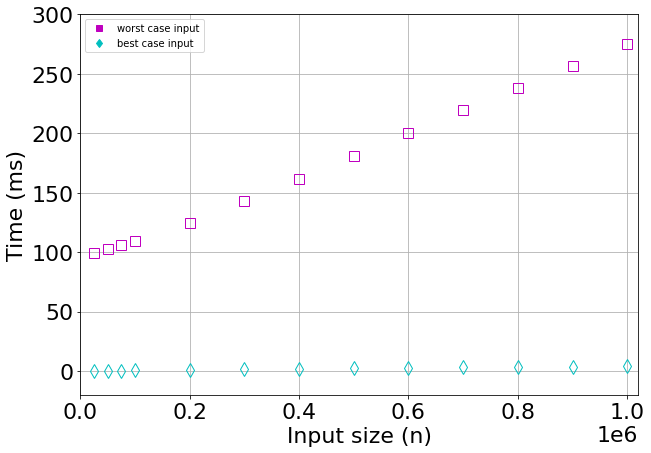

In [54]:
plt.figure(figsize=(10,7))
color = "red"

Rs = []

# for i in range(1,11):
#     Rs.append(polyReg(dfCountingMean16[dfCountingMean16["Input case"] == f"random{i}"]["Size"], dfCountingMean16[dfCountingMean16["Input case"] == f"random{i}"]["Time - readCSV"],1, f"random{i} case input", "darkorange",dots="v",regLine=False))
# plt.plot(-10000,0,"v", color="darkorange",label="countingrandom1 - countingrandom10")
for i in range(len(Rs)):
    print(f"random{i} R2", Rs[i][1], " \n")
worst = polyReg(dfCountingMean16[dfCountingMean16["Input case"] == "worst"]["Size"], dfCountingMean16[dfCountingMean16["Input case"] == "worst"]["Time - readCSV"],1, "Merge time for worst case input", "m",dots="s",regLine=False)
plt.plot(-10000,0,"s", color="m",label="worst case input")
best = polyReg(dfCountingMean16[dfCountingMean16["Input case"] == "best"]["Size"], dfCountingMean16[dfCountingMean16["Input case"] == "best"]["Time - readCSV"],1, "Merge time for best case input", "c",dots="d",regLine=False)
plt.plot(-10000,0,"d", color="c",label="best case input")
print(f"worst R2 ", worst[1], "\n")
print(f"best R2 ", best[1], "\n")
#plt.title("Counting sort wall time vs input size.")
plt.xlabel("Input size (n)", fontsize = 22)
plt.ylabel("Time (ms)", fontsize = 22)
plt.rc('xtick', labelsize = 22)
plt.rc('ytick', labelsize = 22)
plt.xlim(0, 1020000)
plt.ylim(-20, 300)

plt.grid()
plt.legend()
plt.show()


# SQ 2: Time vs bigO


worst R2  0.998864977517756 

Worst gradient:  [ 95.91889556 100.47294871 105.02700186 109.58105502 127.79726763
 146.01348024 164.22969286 182.44590547 200.66211809 218.8783307
 237.09454331 255.31075593 273.52696854] 

best R2  0.996999163192462 

Best gradient:  [0.29578232 0.39610175 0.49642118 0.5967406  0.99801832 1.39929603
 1.80057374 2.20185146 2.60312917 3.00440688 3.4056846  3.80696231
 4.20824002] 



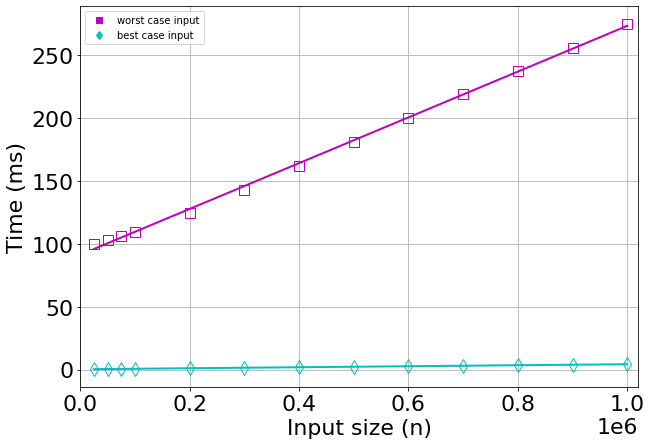

In [55]:
plt.figure(figsize=(10, 7))
color = "red"

Rs = []

# for i in range(1,11):
#     Rs.append(polyReg(dfCountingMean16[dfCountingMean16["Input case"] == f"random{i}"]["Size"], dfCountingMean16[dfCountingMean16["Input case"] == f"random{i}"]["Time - readCSV"],1, f"random{i} case input", "darkorange",dots="v"))
# plt.plot(0,0,"v", color="darkorange",label="countingrandom1 - countingrandom10")
for i in range(len(Rs)):
    print(f"random{i} R2", Rs[i][1], " \n")
worst = polyReg(dfCountingMean16[dfCountingMean16["Input case"] == "worst"]["Size"], dfCountingMean16[dfCountingMean16["Input case"] == "worst"]["Time - readCSV"],1, "Merge time for worst case input", "m",dots="s")
plt.plot(-1000000,0,"s", color="m",label="worst case input")
best = polyReg(dfCountingMean16[dfCountingMean16["Input case"] == "best"]["Size"], dfCountingMean16[dfCountingMean16["Input case"] == "best"]["Time - readCSV"],1, "Merge time for best case input", "c",dots="d")
plt.plot(-1000000,0,"d", color="c",label="best case input")
print(f"worst R2 ", worst[1], "\n")
print(f"Worst gradient: ", worst[2], "\n")
print(f"best R2 ", best[1], "\n")
print(f"Best gradient: ", best[2], "\n")
#plt.title("Counting sort wall time vs input size, with linear regression.")
plt.xlabel("Input size (n)", fontsize = 22)
plt.ylabel("Time (ms)", fontsize = 22)
plt.rc('xtick', labelsize = 22)
plt.rc('ytick', labelsize = 22)
plt.xlim(-10, 1020000)
plt.grid()
plt.legend()
plt.show()


best R2  0.996999163192462 



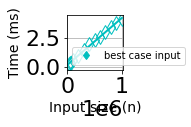

In [56]:
plt.figure(figsize=(1,1))
color = "red"

Rs = []

# for i in range(1,11):
#     Rs.append(polyReg(dfCountingMean16[dfCountingMean16["Input case"] == f"random{i}"]["Time - readCSV"], dfCountingMean16[dfCountingMean16["Input case"] == f"random{i}"]["full EC"],1, f"Random{i} case input", "darkorange",dots="v"))
# plt.plot(-1000000,0,"v", color="darkorange",label="random1 - random10")
# # for i in range(len(Rs)):
# #     print(f"random{i} R2", Rs[i][1], " \n")
# worst = polyReg(dfCountingMean16[dfCountingMean16["Input case"] == "worst"]["Time - readCSV"], dfCountingMean16[dfCountingMean16["Input case"] == "worst"]["full EC"],1, "Merge time for worst case input", "fuchsia",dots="s")
# plt.plot(-100000,0,"s", color="fuchsia",label="worst case input")
# print(f"worst R2 ", worst[1], "\n")
best = polyReg(dfCountingMean16[dfCountingMean16["Input case"] == "best"]["Size"], dfCountingMean16[dfCountingMean16["Input case"] == "best"]["Time - readCSV"],1, "Merge time for best case input", "c",dots="d")
plt.plot(-1000000,0,"d", color="c",label="best case input")
print(f"best R2 ", best[1], "\n")
#plt.title("Counting sort Best case wall time vs input size, with linear regression.")
plt.xlabel("Input size (n)", fontsize = 14)
plt.ylabel("Time (ms)", fontsize = 14)
plt.rc('xtick', labelsize = 10)
plt.rc('ytick', labelsize = 10)
plt.legend()
plt.grid()
plt.xlim(0,1020000)
# plt.ylim(-.001,.035)
plt.show()


# EC vs Time

worst R2  0.9957884707865025 

best R2  0.9989950938306992 



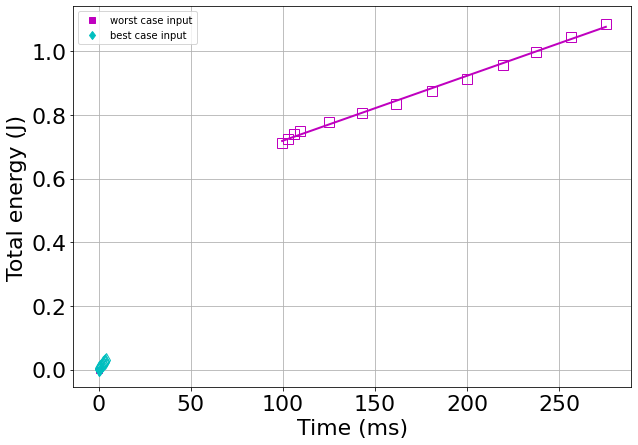

In [62]:
plt.figure(figsize=(10,7))
color = "red"

Rs = []

# for i in range(1,11):
#     Rs.append(polyReg(dfCountingMean16[dfCountingMean16["Input case"] == f"random{i}"]["Time - readCSV"], dfCountingMean16[dfCountingMean16["Input case"] == f"random{i}"]["full EC"],1, f"Random{i} case input", "darkorange",dots="v",regLine=False))
# plt.plot(0,0,"v", color="darkorange",label="countingrandom1 - countingrandom10")
for i in range(len(Rs)):
    print(f"random{i} R2", Rs[i][1], " \n")
worst = polyReg(dfCountingMean16[dfCountingMean16["Input case"] == "worst"]["Time - readCSV"], dfCountingMean16[dfCountingMean16["Input case"] == "worst"]["full EC"],1, "Merge time for worst case input", "m",dots="s",regLine=True)
plt.plot(0,0,"s", color="m",label="worst case input")
print(f"worst R2 ", worst[1], "\n")
best = polyReg(dfCountingMean16[dfCountingMean16["Input case"] == "best"]["Time - readCSV"], dfCountingMean16[dfCountingMean16["Input case"] == "best"]["full EC"],1, "Merge time for best case input", "c",dots="d",regLine=True)
plt.plot(0,0,"d", color="c",label="best case input")
print(f"best R2 ", best[1], "\n")
#plt.title("Counting sort energy consumption vs wall time.")
plt.ylabel("Total energy (J)", fontsize = 22)
plt.xlabel("Time (ms)", fontsize = 22)
plt.rc('xtick', labelsize = 22)
plt.rc('ytick', labelsize = 22)
plt.legend()
plt.grid()
plt.show()


worst R2  0.9957884707865025 



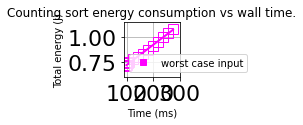

In [58]:
plt.figure(figsize=(1,1))
color = "red"

Rs = []

# for i in range(1,11):
#     Rs.append(polyReg(dfCountingMean16[dfCountingMean16["Input case"] == f"random{i}"]["Time - readCSV"], dfCountingMean16[dfCountingMean16["Input case"] == f"random{i}"]["full EC"],1, f"Random{i} case input", "darkorange",dots="v",regLine=False))
# plt.plot(0,0,"v", color="darkorange",label="countingrandom1 - countingrandom10")
for i in range(len(Rs)):
    print(f"random{i} R2", Rs[i][1], " \n")
worst = polyReg(dfCountingMean16[dfCountingMean16["Input case"] == "worst"]["Time - readCSV"], dfCountingMean16[dfCountingMean16["Input case"] == "worst"]["full EC"],1, "Merge time for worst case input", "fuchsia",dots="s",regLine=True)
plt.plot(0,0,"s", color="fuchsia",label="worst case input")
print(f"worst R2 ", worst[1], "\n")
best = polyReg(dfCountingMean16[dfCountingMean16["Input case"] == "best"]["Time - readCSV"], dfCountingMean16[dfCountingMean16["Input case"] == "best"]["full EC"],1, "Merge time for best case input", "green",dots="d",regLine=True)
#plt.plot(0,0,"d", color="green",label="best case input")
# print(f"best R2 ", best[1], "\n")
plt.title("Counting sort energy consumption vs wall time.")
plt.ylabel("Total energy (J)")
plt.xlabel("Time (ms)")
plt.legend()
plt.xlim(90,300)
plt.ylim(0.6,1.15)
plt.grid()
plt.show()


best R2  0.9989950938306992 



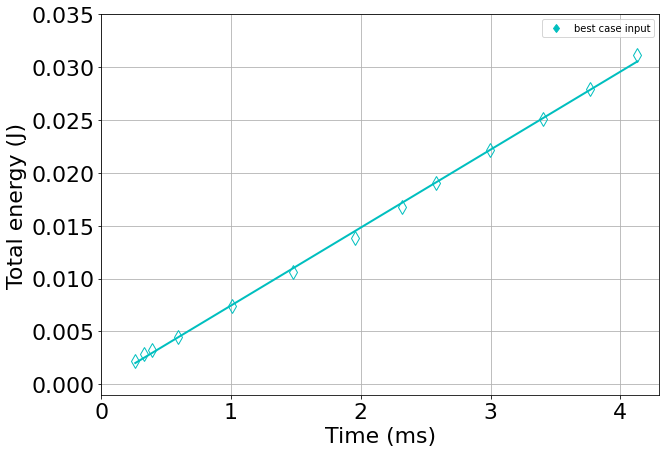

In [59]:
plt.figure(figsize=(10,7))
color = "red"

Rs = []

# for i in range(1,11):
#     Rs.append(polyReg(dfCountingMean16[dfCountingMean16["Input case"] == f"random{i}"]["Time - readCSV"], dfCountingMean16[dfCountingMean16["Input case"] == f"random{i}"]["full EC"],1, f"Random{i} case input", "darkorange",dots="v"))
# plt.plot(-1000000,0,"v", color="darkorange",label="random1 - random10")
# # for i in range(len(Rs)):
# #     print(f"random{i} R2", Rs[i][1], " \n")
# worst = polyReg(dfCountingMean16[dfCountingMean16["Input case"] == "worst"]["Time - readCSV"], dfCountingMean16[dfCountingMean16["Input case"] == "worst"]["full EC"],1, "Merge time for worst case input", "fuchsia",dots="s")
# plt.plot(-100000,0,"s", color="fuchsia",label="worst case input")
# print(f"worst R2 ", worst[1], "\n")
best = polyReg(dfCountingMean16[dfCountingMean16["Input case"] == "best"]["Time - readCSV"], dfCountingMean16[dfCountingMean16["Input case"] == "best"]["full EC"],1, "Merge time for best case input", "c",dots="d",regLine=True)
plt.plot(-1000000,0,"d", color="c",label="best case input")
print(f"best R2 ", best[1], "\n")
#plt.title("Counting sort energy consumption vs wall time.")
plt.ylabel("Total energy (J)", fontsize = 22)
plt.xlabel("Time (ms)", fontsize = 22)
plt.rc('xtick', labelsize = 22)
plt.rc('ytick', labelsize = 22)
plt.legend()
plt.grid()
plt.xlim(0,4.3)
plt.ylim(-.001,.035)
plt.show()


# EC vs big-oh

worst R2  0.9940778482955628 

best R2  0.9992365673253704 



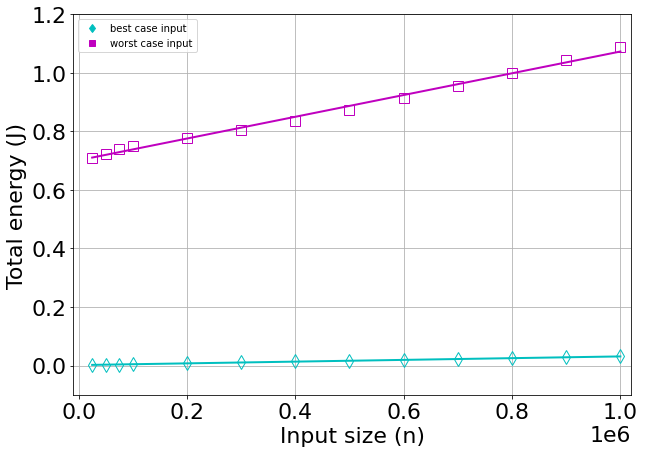

In [60]:
plt.figure(figsize=(10,7))
color = "red"

Rs = []

best = polyReg(dfCountingMean16[dfCountingMean16["Input case"] == "best"]["Size"], dfCountingMean16[dfCountingMean16["Input case"] == "best"]["full EC"],1, "Merge time for best case input", "c",dots="d")
plt.plot(-10000,-10000,"d", color="c",label="best case input")
# for i in range(1,11):
#     Rs.append(polyReg(dfCountingMean16[dfCountingMean16["Input case"] == f"random{i}"]["Size"], dfCountingMean16[dfCountingMean16["Input case"] == f"random{i}"]["full EC"],1, f"random{i} case input", "darkorange",dots="v"))
# plt.plot(-10000,-10000,"v", color="darkorange",label="countingrandom1 - countingrandom10")
for i in range(len(Rs)):
    print(f"random{i} R2", Rs[i][1], " \n")
worst = polyReg(dfCountingMean16[dfCountingMean16["Input case"] == "worst"]["Size"], dfCountingMean16[dfCountingMean16["Input case"] == "worst"]["full EC"],1, "Merge time for worst case input", "m",dots="s")
plt.plot(-10000,-10000,"s", color="m",label="worst case input")
print(f"worst R2 ", worst[1], "\n")
print(f"best R2 ", best[1], "\n")
#plt.title("Counting sort energy consumption vs input size, with linear regression.")
plt.xlabel("Input size (n)", fontsize = 22)
plt.ylabel("Total energy (J)", fontsize = 22)
plt.rc('xtick', labelsize = 22)
plt.rc('ytick', labelsize = 22)
plt.grid()
plt.xlim(-10000,1020000)
plt.ylim(-.1,1.2)

plt.legend()
plt.show()

worst R2  0.9940778482955628 

best R2  0.9992365673253704 



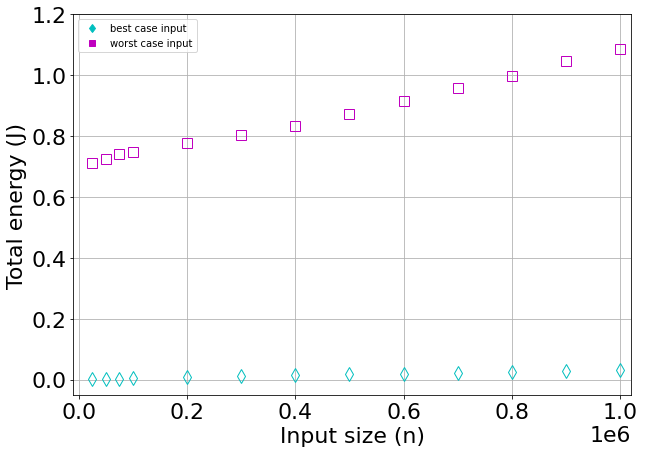

In [63]:
plt.figure(figsize=(10,7))
color = "red"

Rs = []

best = polyReg(dfCountingMean16[dfCountingMean16["Input case"] == "best"]["Size"], dfCountingMean16[dfCountingMean16["Input case"] == "best"]["full EC"],1, "Merge time for best case input", "c",dots="d",regLine=False)
plt.plot(-10000,-10000,"d", color="c",label="best case input")
# for i in range(1,11):
#     Rs.append(polyReg(dfCountingMean16[dfCountingMean16["Input case"] == f"random{i}"]["Size"], dfCountingMean16[dfCountingMean16["Input case"] == f"random{i}"]["full EC"],1, f"random{i} case input", "darkorange",dots="v",regLine=False))
# plt.plot(-10000,-10000,"v", color="darkorange",label="countingrandom1 - countingrandom10")
for i in range(len(Rs)):
    print(f"random{i} R2", Rs[i][1], " \n")
worst = polyReg(dfCountingMean16[dfCountingMean16["Input case"] == "worst"]["Size"], dfCountingMean16[dfCountingMean16["Input case"] == "worst"]["full EC"],1, "Merge time for worst case input", "m",dots="s",regLine=False)
plt.plot(-10000,-10000,"s", color="m",label="worst case input")
print(f"worst R2 ", worst[1], "\n")
print(f"best R2 ", best[1], "\n")
#plt.title("Counting sort energy consumption vs input size.")
plt.xlabel("Input size (n)", fontsize = 22)
plt.ylabel("Total energy (J)", fontsize = 22)
plt.rc('xtick', labelsize = 22)
plt.rc('ytick', labelsize = 22)
plt.grid()
plt.xlim(-10000,1020000)
plt.ylim(-.05,1.2)
plt.legend()
plt.show()